In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import statsmodels.api as sm
from itertools import combinations
import collections

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else "Not-Funded")
#pubs_author_funder['funding_units'] = pubs_author_funder['funder_country'].apply(lambda x: len(x))
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [3]:
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],Not-Funded,89,2018,0.000,0
12759124,65301286,"[Singapore, Singapore]",Not-Funded,44,2017,0.264,1
12759125,65301288,[Iran],Not-Funded,96,2017,0.000,0
12759126,65301295,[Israel],Not-Funded,96,2017,0.000,0


In [3]:
def get_condition_onauthor(data):
    #get the condition matrix, concol is the condition columns probcol is the
    #column calculate probability
    resultlist=[]
    for index, row in data.iterrows():
        authorlist=row['author_country']
        authorlist.sort()
        funderlist=row['funder_country']
        if(funderlist=='Not-Funded'):
            funderlist=[]
        funderlist.sort()
        cntrypair=combinations(authorlist,2)
        for cntry_a,cntry_b in set(cntrypair):
            if (cntry_a in funderlist) and (cntry_b in funderlist):
                resultlist.append([cntry_a,cntry_b,1,1])
                resultlist.append([cntry_b,cntry_a,1,1])
            else:
                resultlist.append([cntry_a,cntry_b,1,0])
                resultlist.append([cntry_b,cntry_a,1,0])
    return resultlist

In [4]:
cond_author=get_condition_onauthor(pubs_author_funder)

In [5]:
def get_condition_onfunder(data):
    #get the condition matrix, concol is the condition columns probcol is the
    #column calculate probability
    resultlist=[]
    for index, row in data.iterrows():
        authorlist=row['author_country']
        authorlist.sort()
        funderlist=row['funder_country']
        if(funderlist=='Not-Funded'):
            funderlist=[]
        funderlist.sort()
        cntrypair=combinations(funderlist,2)
        for cntry_a,cntry_b in set(cntrypair):
            if (cntry_a in authorlist) and (cntry_b in authorlist):
                resultlist.append([cntry_a,cntry_b,1,1])
                resultlist.append([cntry_b,cntry_a,1,1])
            else:
                resultlist.append([cntry_a,cntry_b,1,0])
                resultlist.append([cntry_b,cntry_a,1,0])
    return resultlist

In [6]:
cond_fund=get_condition_onfunder(pubs_author_funder)

In [8]:
def list2df(resultlist):
    df=pd.DataFrame(resultlist)
    df.columns=['source','target','count','pcount']
    df=df.groupby(['source','target']).agg({'count':'size','pcount':'sum'}).reset_index()
    return df

In [9]:
cond_author_df=list2df(cond_author)
cond_author_df.head()

,source,target,count,pcount
0,Afghanistan,Afghanistan,150,0
1,Afghanistan,Algeria,3,0
2,Afghanistan,Angola,3,0
3,Afghanistan,Argentina,7,0
4,Afghanistan,Australia,27,0


In [10]:
cond_author_df['ratio']=cond_author_df['pcount']/cond_author_df['count']
cond_author_df.head()

,source,target,count,pcount,ratio
0,Afghanistan,Afghanistan,150,0,0.0
1,Afghanistan,Algeria,3,0,0.0
2,Afghanistan,Angola,3,0,0.0
3,Afghanistan,Argentina,7,0,0.0
4,Afghanistan,Australia,27,0,0.0


In [11]:
cond_author_df[(cond_author_df.source=='China')&(cond_author_df.target=='United States')]


,source,target,count,pcount,ratio
5557,China,United States,269256,71180,0.264358


In [12]:
cond_author_df[(cond_author_df.source=='United States')&(cond_author_df.target=='China')]


,source,target,count,pcount,ratio
27857,United States,China,269256,71180,0.264358


In [13]:
cond_fund_df=list2df(cond_fund)
cond_fund_df.head()

,source,target,count,pcount
0,Afghanistan,Australia,15,0
1,Afghanistan,Austria,16,0
2,Afghanistan,Bangladesh,20,0
3,Afghanistan,Bhutan,20,0
4,Afghanistan,Burma,20,0


In [14]:
cond_fund_df['ratio']=cond_fund_df['pcount']/cond_fund_df['count']
cond_fund_df.head()

,source,target,count,pcount,ratio
0,Afghanistan,Australia,15,0,0.0
1,Afghanistan,Austria,16,0,0.0
2,Afghanistan,Bangladesh,20,0,0.0
3,Afghanistan,Bhutan,20,0,0.0
4,Afghanistan,Burma,20,0,0.0


In [16]:
def plot_matrix(data):
    
    matrix=data.pivot(index='source',columns='target',values='ratio')
    matrix=matrix.fillna(0)
    g = sns.clustermap(matrix)
    return g

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


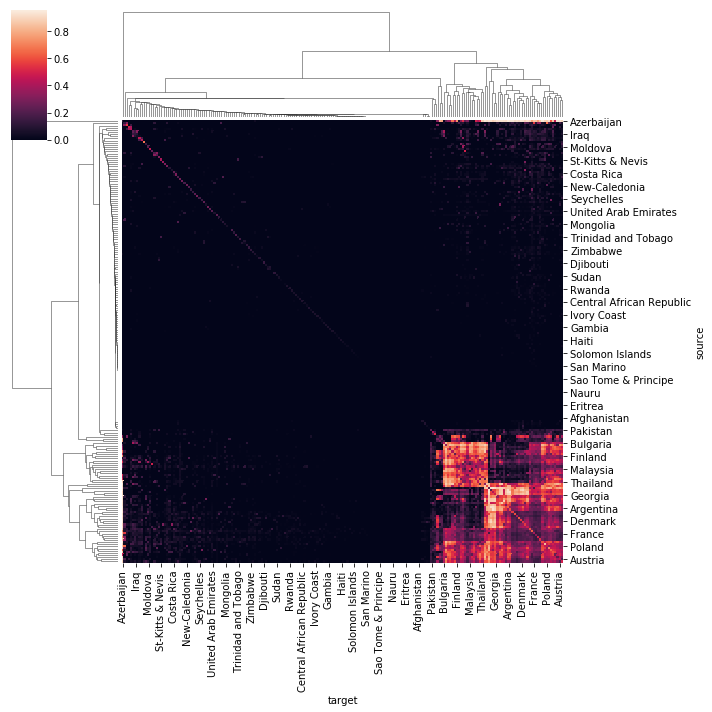

In [17]:
g=plot_matrix(cond_author_df)
plt.savefig('cond_author_all.pdf')

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


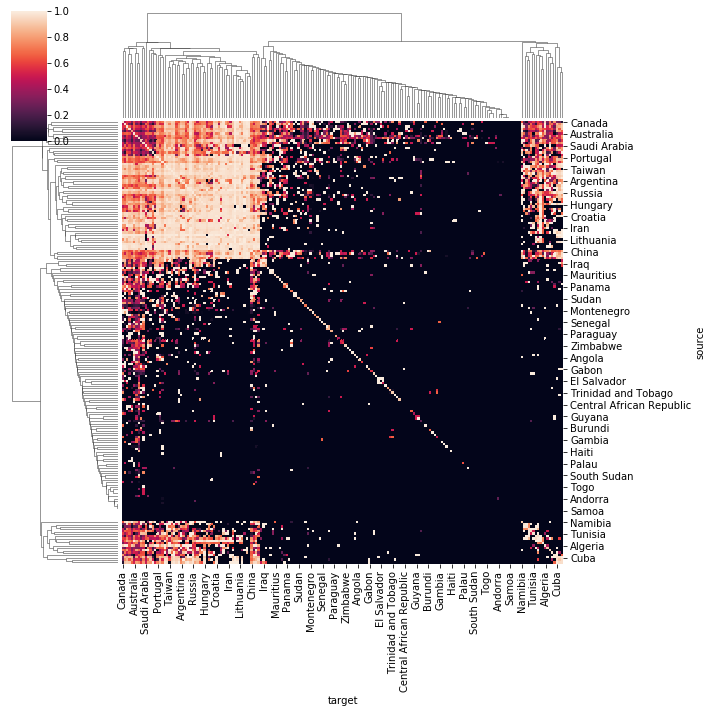

In [18]:
g=plot_matrix(cond_fund_df)
plt.savefig('cond_fund_all.pdf')

In [19]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [20]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index()
cntry_out.columns=['country','unit_out']
cntry_out=cntry_out.sort_values(by="unit_out", ascending=False)
cntry_out=cntry_out[cntry_out.country!="EU"]
top20_df=cntry_out.head(20)
cntry_top20=top20_df.country

In [23]:
def plot_select(data,cntry_top20):
    fig, ax=plt.subplots(figsize=(10,8))
    matrix=data.pivot(index='source',columns='target',values='ratio')
    g = sns.heatmap(matrix.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20)
    return g


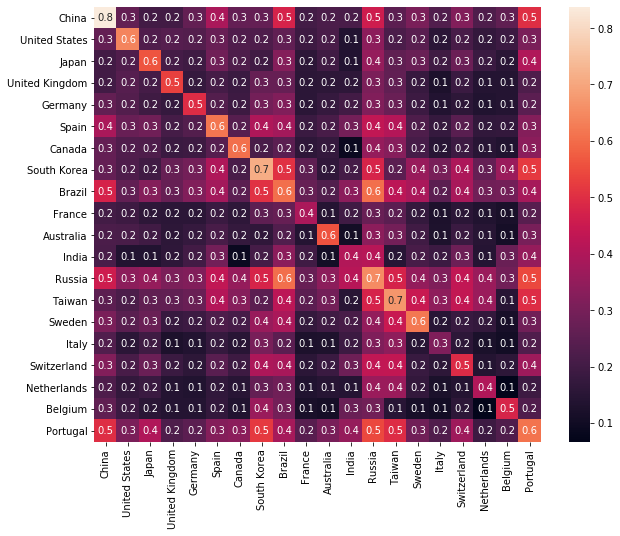

In [27]:
plot_select(cond_author_df,cntry_top20)
plt.savefig('cond_author_top20.pdf',format="pdf",bbox_inches="tight")